In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Load the CIFAR-10 dataset
def load_and_preprocess_cifar10():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    
    # Normalize the data: Convert pixel values from [0, 255] to [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    # Flatten the images: Convert from (32, 32, 3) to (3072,)
    x_train_flattened = x_train.reshape(x_train.shape[0], -1)
    x_test_flattened = x_test.reshape(x_test.shape[0], -1)
    
    # Squeeze labels to 1D
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()
    
    return x_train_flattened, y_train, x_test_flattened, y_test


In [3]:
# Preprocessing
x_train, y_train, x_test, y_test = load_and_preprocess_cifar10()

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

170498071/170498071 [==============================] - 147s 1us/step


In [4]:
# Step 2: Define the model
def initialize_parameters(num_features, num_classes):
    weights = np.random.randn(num_features, num_classes) * 0.01
    bias = np.zeros((1, num_classes))
    return weights, bias

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def compute_loss(y, y_hat):
    m = y.shape[0]
    correct_logprobs = -np.log(y_hat[range(m), y])
    loss = np.sum(correct_logprobs) / m
    return loss

def predict(x, weights, bias):
    scores = np.dot(x, weights) + bias
    probs = softmax(scores)
    return np.argmax(probs, axis=1)

In [5]:
# Step 3: Train the model
def train(x, y, num_classes, learning_rate=1e-3, epochs=200, batch_size=200):
    num_features = x.shape[1]
    weights, bias = initialize_parameters(num_features, num_classes)
    
    for epoch in range(epochs):
        # Mini-batch gradient descent
        for i in range(0, x.shape[0], batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            scores = np.dot(x_batch, weights) + bias
            probs = softmax(scores)
            
            # Compute the loss
            loss = compute_loss(y_batch, probs)
            
            # Backpropagation
            dscores = probs
            dscores[range(x_batch.shape[0]), y_batch] -= 1
            dscores /= x_batch.shape[0]
            dweights = np.dot(x_batch.T, dscores)
            dbias = np.sum(dscores, axis=0, keepdims=True)
            
            # Parameter update
            weights -= learning_rate * dweights
            bias -= learning_rate * dbias
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, loss: {loss}')
    
    return weights, bias

In [6]:
# Training
num_classes = 10  # CIFAR-10 has 10 classes
weights, bias = train(x_train, y_train, num_classes)

Epoch 0, loss: 1.9805827199750012
Epoch 10, loss: 1.7896159208655695
Epoch 20, loss: 1.743559259519618
Epoch 30, loss: 1.7181705639172342
Epoch 40, loss: 1.7012046899067566
Epoch 50, loss: 1.688734247670239
Epoch 60, loss: 1.6790189742850703
Epoch 70, loss: 1.6711379848857928
Epoch 80, loss: 1.6645483917804256
Epoch 90, loss: 1.6589071089431602
Epoch 100, loss: 1.6539864784266292
Epoch 110, loss: 1.6496296374934392
Epoch 120, loss: 1.6457250568015622
Epoch 130, loss: 1.6421912281281201
Epoch 140, loss: 1.6389670884774739
Epoch 150, loss: 1.6360058432158087
Epoch 160, loss: 1.6332708774164866
Epoch 170, loss: 1.6307329882982176
Epoch 180, loss: 1.6283684743904485
Epoch 190, loss: 1.6261577922436061


In [7]:
# Step 4: Evaluate the model
y_pred = predict(x_test, weights, bias)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 41.30%


WITH REGULARIZATION:


In [45]:
def train_with_regularization(x, y, num_classes, learning_rate=0.0001, epochs=200, batch_size=200, lambda_=0.001):
    num_features = x.shape[1]
    weights, bias = initialize_parameters(num_features, num_classes)
    
    for epoch in range(epochs):
        # Mini-batch gradient descent
        for i in range(0, x.shape[0], batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            scores = np.dot(x_batch, weights) + bias
            probs = softmax(scores)
            
            # Compute the loss with L2 regularization
            loss = compute_loss(y_batch, probs) + (lambda_ / 2) * np.sum(weights**2)
            
            # Backpropagation
            dscores = probs
            dscores[range(x_batch.shape[0]), y_batch] -= 1
            dscores /= x_batch.shape[0]
            dweights = np.dot(x_batch.T, dscores) + lambda_ * weights  # L2 regularization gradient
            dbias = np.sum(dscores, axis=0, keepdims=True)
            
            # Parameter update
            weights -= learning_rate * dweights
            bias -= learning_rate * dbias
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, loss: {loss}')
    
    return weights, bias


In [46]:
# Training with regularization
weights_reg, bias_reg = train_with_regularization(x_train, y_train, num_classes, learning_rate=0.0001, epochs=200, batch_size=200, lambda_=0.001)


Epoch 0, loss: 2.17056828456378
Epoch 10, loss: 1.9565812178309465
Epoch 20, loss: 1.9106029397073339
Epoch 30, loss: 1.8823210733323852
Epoch 40, loss: 1.8616293037585496
Epoch 50, loss: 1.845429594167334
Epoch 60, loss: 1.8322179336231208
Epoch 70, loss: 1.8211235429271315
Epoch 80, loss: 1.811596676293967
Epoch 90, loss: 1.803270443149134
Epoch 100, loss: 1.7958895240445238
Epoch 110, loss: 1.7892701232505297
Epoch 120, loss: 1.783276141508401
Epoch 130, loss: 1.7778043520566622
Epoch 140, loss: 1.772774826658163
Epoch 150, loss: 1.7681245503606715
Epoch 160, loss: 1.7638030430689102
Epoch 170, loss: 1.7597692844337849
Epoch 180, loss: 1.7559895089667914
Epoch 190, loss: 1.7524355964345417


In [47]:
# Evaluate the model with regularization
y_pred_reg = predict(x_test, weights_reg, bias_reg)
accuracy_reg = accuracy_score(y_test, y_pred_reg)
print(f'Test accuracy with regularization: {accuracy_reg * 100:.2f}%')

Test accuracy with regularization: 40.79%


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

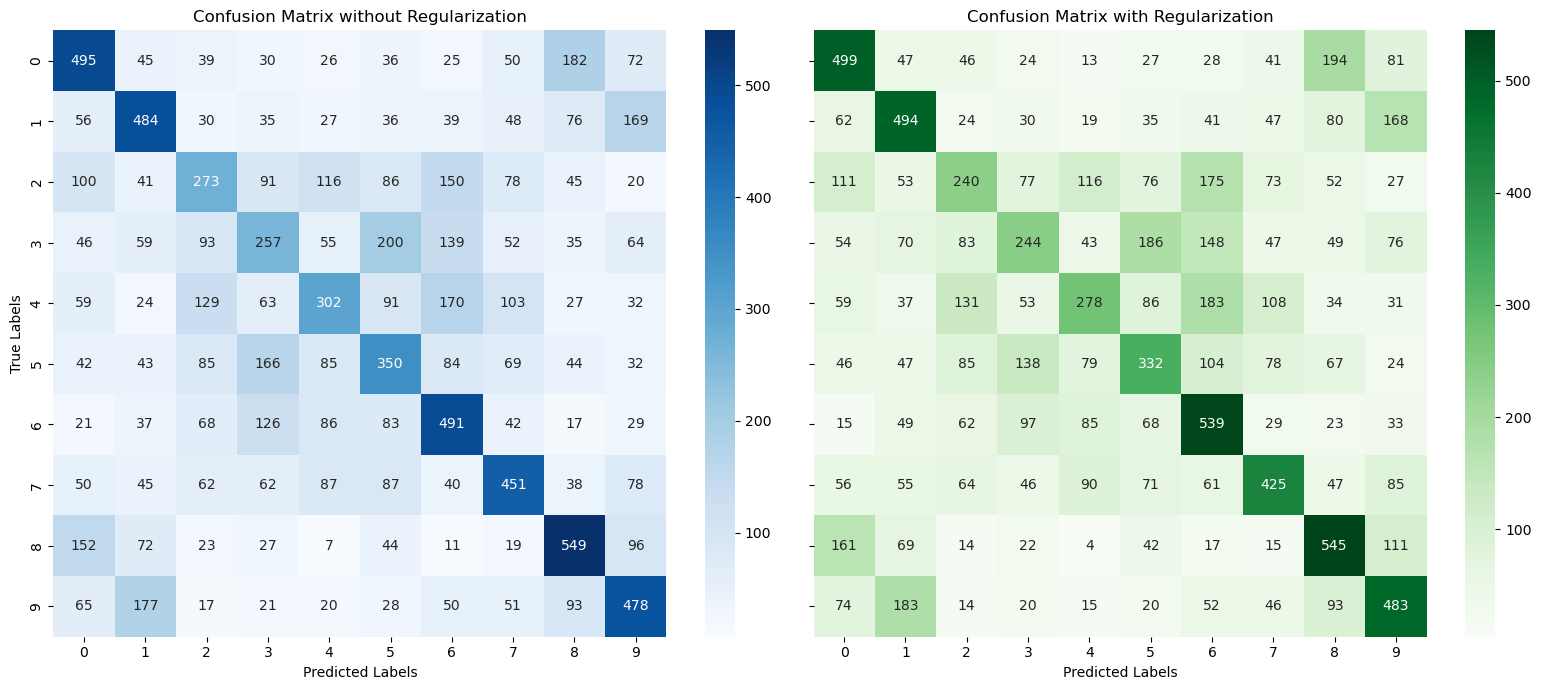

In [49]:
# Calculate confusion matrices
cm = confusion_matrix(y_test, y_pred)
cm_reg = confusion_matrix(y_test, y_pred_reg)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

# Non-Regularized Model
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix without Regularization')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Regularized Model
sns.heatmap(cm_reg, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title('Confusion Matrix with Regularization')
ax[1].set_xlabel('Predicted Labels')
# ax[1].set_ylabel('True Labels')  # Already shared with the first subplot

plt.tight_layout()
plt.show()

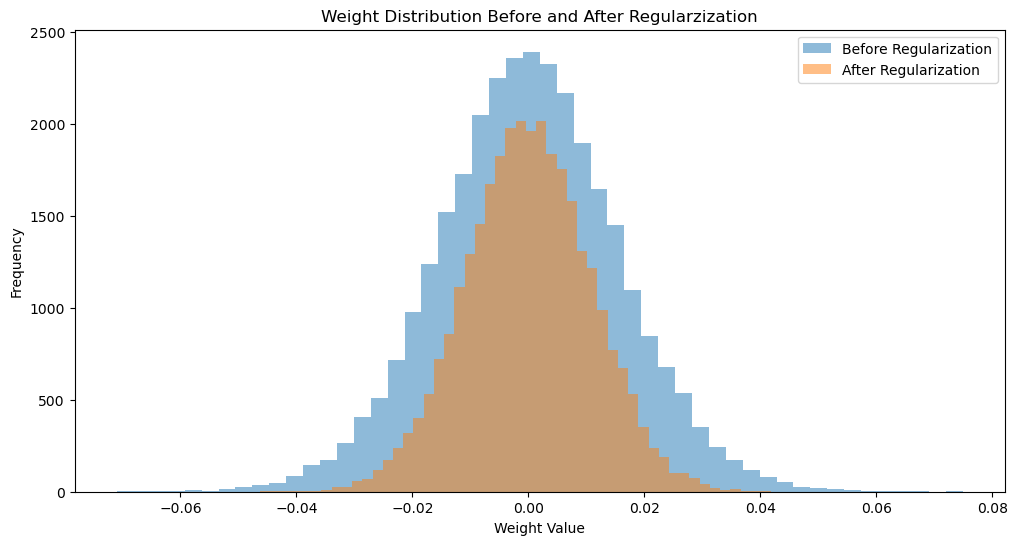

In [50]:
def plot_weight_distribution(weights, weights_reg):
    plt.figure(figsize=(12, 6))
    plt.hist(weights.flatten(), bins=50, alpha=0.5, label='Before Regularization')
    plt.hist(weights_reg.flatten(), bins=50, alpha=0.5, label='After Regularization')
    plt.title('Weight Distribution Before and After Regularzization')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Assuming weights_before and weights_after are arrays of your model's weights
plot_weight_distribution(weights, weights_reg)